<a href="https://colab.research.google.com/github/ffneiva/py-qui/blob/main/2022-08-06-python-aplicado-as-finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análise Financeira com Python

### 1. Objetivos

- Importar, tratar e visualizar dados dos ativos 
- Plotar gráficos 
- Comparar a carteira com o IBOV
- Importar fundamentos

##### Passo a Passo

1. Importar base de dados
2. Entender base de dados
3. Importar dados de ativos de renda variável para o python
4. Importar dados de ativos de renda fixa par ao python
5. Juntar dados dos ativos
6. Visualizar comportamento dos ativos ao longo do tempo
7. Comparar rentabilidade da carteira com IBOV e/ou outros ativos
8. Análise fundamentalista

### 2. Importar e visualizar a carteira

In [ ]:
import pandas as pd

carteira = pd.read_excel('/content/drive/MyDrive/0. Pasta/carteira_pki.xlsx')
display(carteira)

,Ativos,Tipo,Valor Investido
0,EGIE3,Ação,15000.0
1,ENBR3,Ação,25000.0
2,TAEE3,Ação,20000.0
3,PETR4,Ação,30000.0
4,BBAS3,Ação,15000.0
5,ITUB4,Ação,10000.0
6,TSLA34,BDR,5000.0
7,AMZO34,BDR,10000.0
8,IVVB11,ETF,10000.0
9,ONEF11,FII,30000.0


In [ ]:
carteira['Valor Investido'].sum()

330000.0

In [ ]:
carteira_tipos = carteira.groupby('Tipo').sum()
display(carteira_tipos)

,Valor Investido
Tipo,
Ação,115000.0
BDR,15000.0
Criptomoeda,30000.0
ETF,10000.0
FII,60000.0
Renda Fixa,100000.0


Referência: 
- Gráfico de pizza: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
- Legenda: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

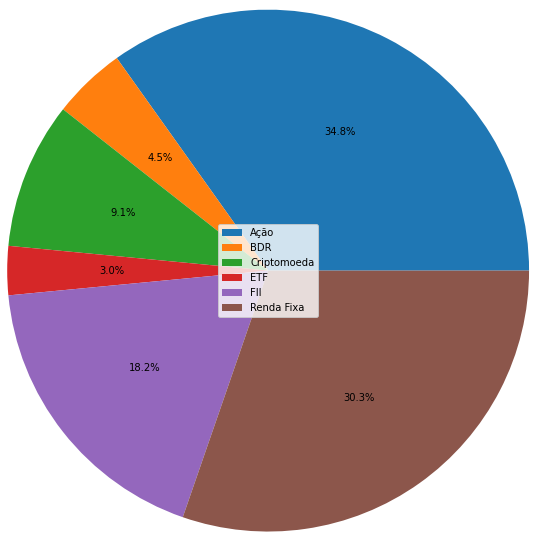

In [ ]:
import matplotlib.pyplot as plt

plt.pie(carteira_tipos['Valor Investido'], autopct='%.1f%%', radius=3)
plt.legend(carteira_tipos.index, loc='center')
plt.show()

### Bônus: Pegar sempre a data de hoje

In [ ]:
import datetime

data_inicio = '2019-01-01'
data_final = datetime.date.today()
print(data_inicio)
print(data_final)

2019-01-01
2022-08-06


### 3. IBOV

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

cotacao_ibov = yf.download('^BVSP', start=data_inicio, end=data_final)
display(cotacao_ibov)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,87887.0,91479.0,87536.0,91012.0,91012.0,5615400
2019-01-03,91011.0,91596.0,89922.0,91564.0,91564.0,6066200
2019-01-04,91577.0,92701.0,90824.0,91841.0,91841.0,5322100
2019-01-07,91845.0,92552.0,91288.0,91699.0,91699.0,4565000
2019-01-08,91699.0,92231.0,91064.0,92032.0,92032.0,4496500
...,...,...,...,...,...,...
2022-08-01,103165.0,103317.0,101764.0,102225.0,102225.0,11626700
2022-08-02,102225.0,103660.0,101694.0,103362.0,103362.0,10124500
2022-08-03,103362.0,103878.0,102822.0,103775.0,103775.0,12379600


In [ ]:
cotacao_ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,103165.0,103317.0,101764.0,102225.0,102225.0,11626700
2022-08-02,102225.0,103660.0,101694.0,103362.0,103362.0,10124500
2022-08-03,103362.0,103878.0,102822.0,103775.0,103775.0,12379600
2022-08-04,103777.0,106162.0,103777.0,105892.0,105892.0,15499000
2022-08-05,105893.0,107176.0,105518.0,106472.0,106472.0,12947500


In [ ]:
cotacao_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 893 entries, 2019-01-02 to 2022-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       893 non-null    float64
 1   High       893 non-null    float64
 2   Low        893 non-null    float64
 3   Close      893 non-null    float64
 4   Adj Close  893 non-null    float64
 5   Volume     893 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.8 KB


In [ ]:
cotacao_ibov.describe()

,Open,High,Low,Close,Adj Close,Volume
count,893.000000,893.000000,893.000000,893.000000,893.000000,8.930000e+02
mean,105877.118701,106904.279955,104835.984323,105895.416573,105895.416573,8.622193e+06
std,11856.526494,11629.740671,12021.850894,11841.451837,11841.451837,3.551055e+06
min,63604.000000,67604.000000,61691.000000,63570.000000,63570.000000,0.000000e+00
25%,98308.000000,99240.000000,97467.000000,98311.000000,98311.000000,5.398900e+06
50%,105303.000000,106125.000000,104337.000000,105351.000000,105351.000000,8.830700e+06
75%,115057.000000,115599.000000,113712.000000,114992.000000,114992.000000,1.113470e+07
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.176870e+07


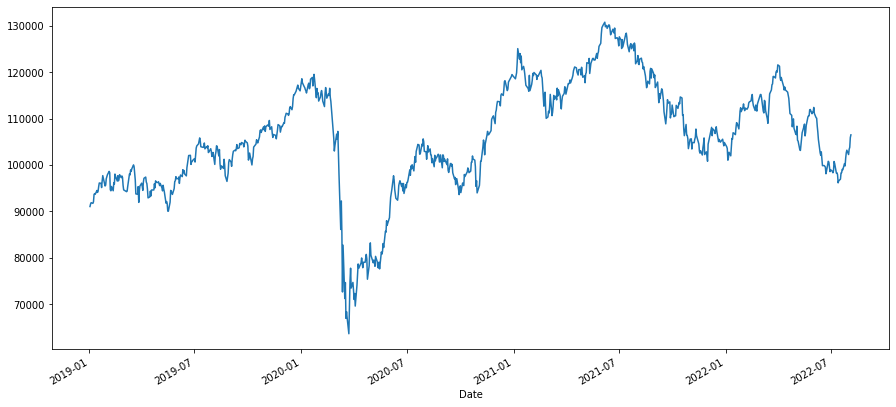

In [ ]:
cotacao_ibov['Adj Close'].plot(figsize=(15, 7))

In [ ]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 4.5 MB/s 


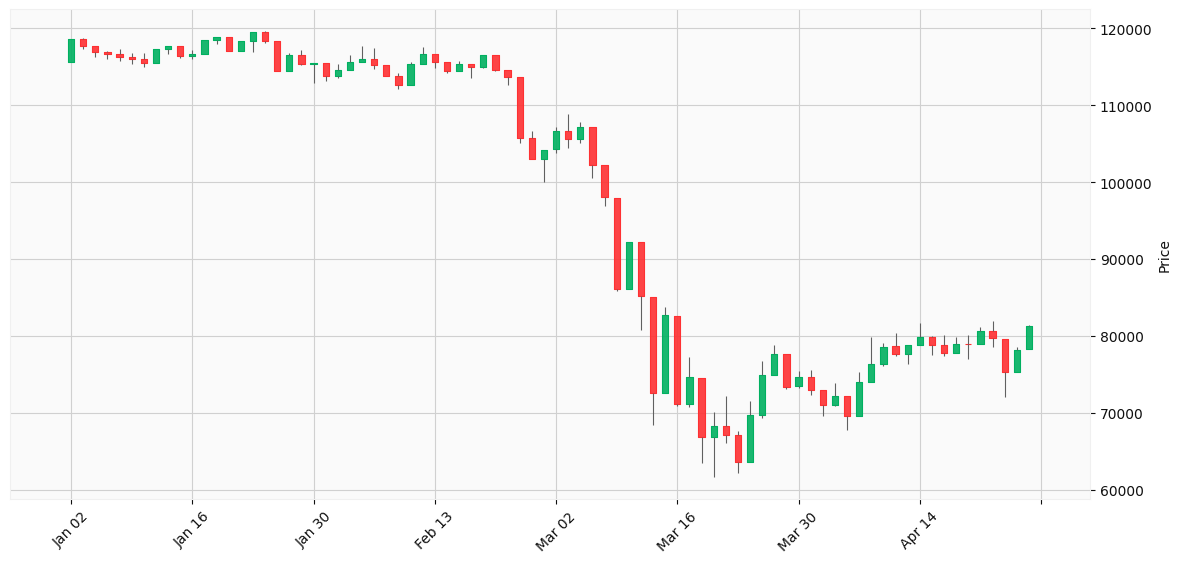

In [ ]:
import mplfinance as mpf

mpf.plot(cotacao_ibov[248:248+80], type='candle', style='yahoo', figsize=(15, 7))

### 4. Importar e visualizar dados dos ativos

##### Ativos de renda variável da carteira

In [ ]:
cotacao_ativos = pd.DataFrame()

for i, ativo in enumerate(carteira['Ativos']):
    if carteira['Tipo'][i] != 'Renda Fixa' and carteira['Tipo'][i] != 'Criptomoeda':
        cotacao_ativos[ativo] = yf.download('{}.SA'.format(ativo), 
                                            start=data_inicio, 
                                            end=data_final)['Adj Close']

cotacao_ativos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,EGIE3,ENBR3,TAEE3,PETR4,BBAS3,ITUB4,TSLA34,AMZO34,IVVB11,ONEF11,BRCR11,ABCP11
Date,,,,,,,,,,,,
2019-01-02,26.926563,11.795794,6.233357,12.641031,39.050594,32.911713,7.993750,14.767300,74.250000,145.583969,96.435425,84.008560
2019-01-03,27.809921,12.286593,6.303005,12.951015,39.211288,33.454323,7.132750,14.767300,74.250000,145.583969,97.566666,84.489151
2019-01-04,28.406986,12.378098,6.428368,12.987791,39.211288,32.893925,7.180250,14.748550,74.250000,145.408096,97.390503,84.969749
2019-01-07,28.231035,12.020397,6.393547,13.192698,38.954159,32.956184,7.180250,15.122400,74.250000,140.698593,97.919037,86.507652
2019-01-08,28.550934,12.061990,6.303005,13.113890,38.512222,33.374264,7.180250,15.443650,74.250000,136.800064,97.640869,86.507652
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,43.699551,21.549999,13.130462,27.425274,35.680000,23.469999,143.899994,34.880001,233.949997,160.080963,57.777977,67.500000
2022-08-02,43.424156,21.680000,13.381670,27.547417,36.160000,23.719999,149.250000,35.360001,237.000000,159.086670,57.906921,67.389999
2022-08-03,42.420925,21.670000,13.372007,27.563702,36.410000,23.889999,152.199997,37.000000,240.550003,160.080963,57.093567,67.000000


##### Ativos de criptomoedas

In [ ]:
ethereum = yf.download('ETH-USD', data_inicio, data_final)['Adj Close']
ethereum

[*********************100%***********************]  1 of 1 completed


Date
2019-01-01     140.819412
2019-01-02     155.047684
2019-01-03     149.135010
2019-01-04     154.581940
2019-01-05     155.638596
                 ...     
2022-08-02    1632.945435
2022-08-03    1618.874512
2022-08-04    1608.205811
2022-08-05    1732.254639
2022-08-06    1691.658081
Name: Adj Close, Length: 1314, dtype: float64

In [ ]:
ethereum = ethereum.rename('Ethereum')
cotacao_ativos = cotacao_ativos.merge(ethereum.to_frame(), on='Date')
cotacao_ativos

,EGIE3,ENBR3,TAEE3,PETR4,BBAS3,ITUB4,TSLA34,AMZO34,IVVB11,ONEF11,BRCR11,ABCP11,Ethereum
Date,,,,,,,,,,,,,
2019-01-02,26.926563,11.795794,6.233357,12.641031,39.050594,32.911713,7.993750,14.767300,74.250000,145.583969,96.435425,84.008560,155.047684
2019-01-03,27.809921,12.286593,6.303005,12.951015,39.211288,33.454323,7.132750,14.767300,74.250000,145.583969,97.566666,84.489151,149.135010
2019-01-04,28.406986,12.378098,6.428368,12.987791,39.211288,32.893925,7.180250,14.748550,74.250000,145.408096,97.390503,84.969749,154.581940
2019-01-07,28.231035,12.020397,6.393547,13.192698,38.954159,32.956184,7.180250,15.122400,74.250000,140.698593,97.919037,86.507652,151.699219
2019-01-08,28.550934,12.061990,6.303005,13.113890,38.512222,33.374264,7.180250,15.443650,74.250000,136.800064,97.640869,86.507652,150.359634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,43.699551,21.549999,13.130462,27.425274,35.680000,23.469999,143.899994,34.880001,233.949997,160.080963,57.777977,67.500000,1635.195801
2022-08-02,43.424156,21.680000,13.381670,27.547417,36.160000,23.719999,149.250000,35.360001,237.000000,159.086670,57.906921,67.389999,1632.945435
2022-08-03,42.420925,21.670000,13.372007,27.563702,36.410000,23.889999,152.199997,37.000000,240.550003,160.080963,57.093567,67.000000,1618.874512


##### Ativos de renda fixa da carteira

In [ ]:
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/' + \
    'df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9' + \
    '-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro = pd.read_csv(link, sep=';', decimal=',')

tesouro['Data Base'] = pd.to_datetime(tesouro['Data Base'])
display(tesouro)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IPCA+,15/08/2024,2017-08-28,4.86,4.98,2163.15,2146.08,2145.40
1,Tesouro Prefixado,01/01/2023,2017-08-28,9.88,10.00,605.92,602.41,602.18
2,Tesouro Prefixado com Juros Semestrais,01/01/2021,2017-08-28,9.09,9.21,1041.39,1038.09,1037.73
3,Tesouro IPCA+,15/05/2019,2017-07-08,3.44,3.56,2823.38,2817.67,2817.19
4,Tesouro Prefixado,01/01/2019,2017-07-08,7.96,8.08,899.35,897.97,897.70
...,...,...,...,...,...,...,...,...
124174,Tesouro IGPM+ com Juros Semestrais,01/03/2011,2005-07-18,8.51,8.57,1681.38,1677.05,1676.46
124175,Tesouro IGPM+ com Juros Semestrais,01/07/2017,2005-07-18,8.40,8.48,1522.91,1513.61,1513.09
124176,Tesouro IGPM+ com Juros Semestrais,01/04/2021,2005-07-18,8.40,8.48,1499.09,1488.62,1488.11
124177,Tesouro IGPM+ com Juros Semestrais,01/01/2031,2005-07-18,8.40,8.50,2517.54,2493.59,2492.73


In [ ]:
tesouro_selic = tesouro.loc[tesouro['Tipo Titulo']=='Tesouro Selic'].reset_index(drop=True)
display(tesouro_selic)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Selic,01/03/2021,2017-07-08,0.01,0.05,9007.66,8994.94,8991.77
1,Tesouro Selic,01/03/2023,2017-07-08,0.01,0.05,9005.86,8985.95,8982.78
2,Tesouro Selic,01/03/2021,2017-09-08,0.01,0.05,9013.93,9001.23,8998.05
3,Tesouro Selic,01/03/2023,2017-09-08,0.01,0.05,9012.13,8992.23,8989.06
4,Tesouro Selic,01/03/2021,2017-04-08,0.01,0.05,9004.53,8991.80,8988.62
...,...,...,...,...,...,...,...,...
16570,Tesouro Selic,18/01/2006,2005-07-18,0.06,0.07,2375.85,2375.73,2374.03
16571,Tesouro Selic,17/01/2007,2005-07-18,0.11,0.13,2372.69,2371.98,2370.27
16572,Tesouro Selic,18/06/2008,2005-07-18,0.23,0.26,2360.85,2358.81,2357.10
16573,Tesouro Selic,18/03/2009,2005-07-18,0.33,0.37,2348.19,2344.78,2343.07


##### Juntando os ativos

In [ ]:
tesouro_selic = tesouro_selic.rename(columns={'Data Base': 'Date', 'PU Base Manha': 'Tesouro Selic'})
cotacoes = cotacao_ativos.merge(tesouro_selic[['Date', 'Tesouro Selic']], on='Date')
cotacoes = cotacoes.set_index('Date')
display(cotacoes)

,EGIE3,ENBR3,TAEE3,PETR4,BBAS3,ITUB4,TSLA34,AMZO34,IVVB11,ONEF11,BRCR11,ABCP11,Ethereum,Tesouro Selic
Date,,,,,,,,,,,,,,
2019-01-02,26.926563,11.795794,6.233357,12.641031,39.050594,32.911713,7.993750,14.767300,74.250000,145.583969,96.435425,84.008560,155.047684,9900.45
2019-01-02,26.926563,11.795794,6.233357,12.641031,39.050594,32.911713,7.993750,14.767300,74.250000,145.583969,96.435425,84.008560,155.047684,9930.40
2019-01-02,26.926563,11.795794,6.233357,12.641031,39.050594,32.911713,7.993750,14.767300,74.250000,145.583969,96.435425,84.008560,155.047684,9916.38
2019-01-03,27.809921,12.286593,6.303005,12.951015,39.211288,33.454323,7.132750,14.767300,74.250000,145.583969,97.566666,84.489151,149.135010,9949.78
2019-01-03,27.809921,12.286593,6.303005,12.951015,39.211288,33.454323,7.132750,14.767300,74.250000,145.583969,97.566666,84.489151,149.135010,9979.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03,42.420925,21.670000,13.372007,27.563702,36.410000,23.889999,152.199997,37.000000,240.550003,160.080963,57.093567,67.000000,1618.874512,11400.74
2022-08-04,42.283226,21.959999,13.497612,27.856846,37.099998,24.469999,150.699997,37.130001,237.699997,160.080963,57.301865,67.709999,1608.205811,11533.17
2022-08-04,42.283226,21.959999,13.497612,27.856846,37.099998,24.469999,150.699997,37.130001,237.699997,160.080963,57.301865,67.709999,1608.205811,11516.16


##### Verificar informações

In [ ]:
cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2596 entries, 2019-01-02 to 2022-08-04
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EGIE3          2596 non-null   float64
 1   ENBR3          2596 non-null   float64
 2   TAEE3          2596 non-null   float64
 3   PETR4          2596 non-null   float64
 4   BBAS3          2596 non-null   float64
 5   ITUB4          2596 non-null   float64
 6   TSLA34         2596 non-null   float64
 7   AMZO34         2596 non-null   float64
 8   IVVB11         2596 non-null   float64
 9   ONEF11         2596 non-null   float64
 10  BRCR11         2596 non-null   float64
 11  ABCP11         2596 non-null   float64
 12  Ethereum       2596 non-null   float64
 13  Tesouro Selic  2596 non-null   float64
dtypes: float64(14)
memory usage: 304.2 KB


In [ ]:
cotacoes = cotacoes.groupby(cotacoes.index).mean()
display(cotacoes)

,EGIE3,ENBR3,TAEE3,PETR4,BBAS3,ITUB4,TSLA34,AMZO34,IVVB11,ONEF11,BRCR11,ABCP11,Ethereum,Tesouro Selic
Date,,,,,,,,,,,,,,
2019-01-02,26.926563,11.795794,6.233357,12.641031,39.050594,32.911713,7.993750,14.767300,74.250000,145.583969,96.435425,84.008560,155.047684,9915.743333
2019-01-03,27.809921,12.286593,6.303005,12.951015,39.211288,33.454323,7.132750,14.767300,74.250000,145.583969,97.566666,84.489151,149.135010,9965.050000
2019-01-04,28.406986,12.378098,6.428368,12.987791,39.211288,32.893925,7.180250,14.748550,74.250000,145.408096,97.390503,84.969749,154.581940,10012.756667
2019-01-07,28.231035,12.020397,6.393547,13.192698,38.954159,32.956184,7.180250,15.122400,74.250000,140.698593,97.919037,86.507652,151.699219,10177.873333
2019-01-08,28.550934,12.061990,6.303005,13.113890,38.512222,33.374264,7.180250,15.443650,74.250000,136.800064,97.640869,86.507652,150.359634,10235.853333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,43.306126,21.660000,13.072490,26.293411,36.209999,23.682291,136.199997,34.304501,230.800003,160.836624,55.337910,66.821960,1725.468140,11918.245000
2022-07-29,43.493004,21.700001,13.140123,27.807989,35.970001,23.602350,143.970001,35.167999,234.500000,159.772736,56.389320,67.070000,1727.406982,11924.175000
2022-08-02,43.424156,21.680000,13.381670,27.547417,36.160000,23.719999,149.250000,35.360001,237.000000,159.086670,57.906921,67.389999,1632.945435,11292.245000


### 5. Visualizar cotação dos ativos da carteira

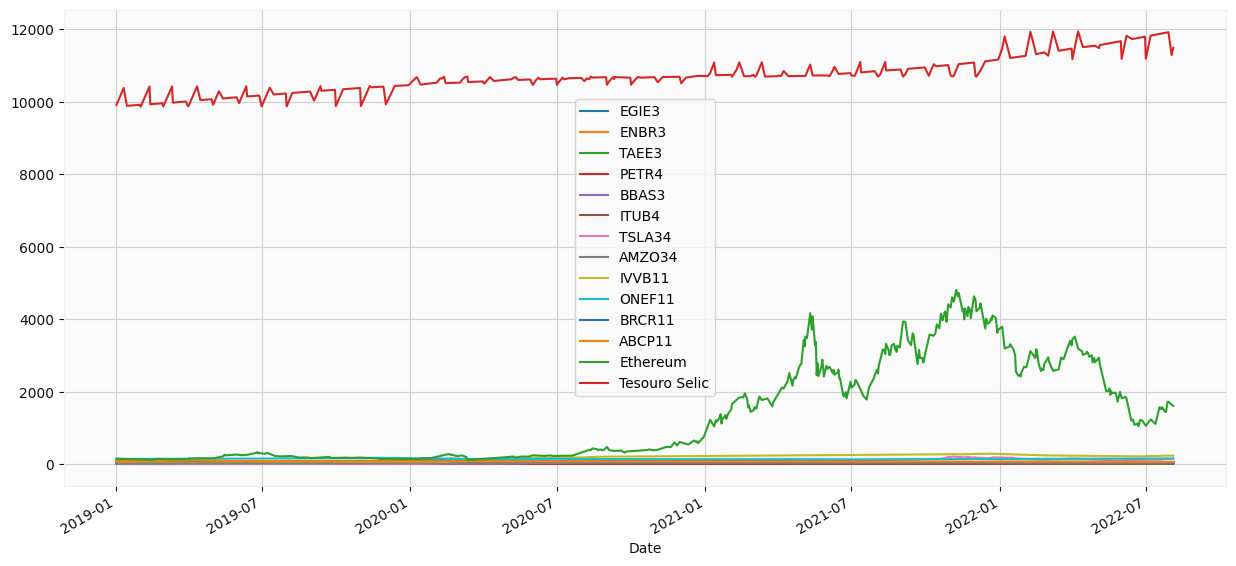

In [ ]:
cotacoes.plot(figsize=(15, 7))
plt.show()

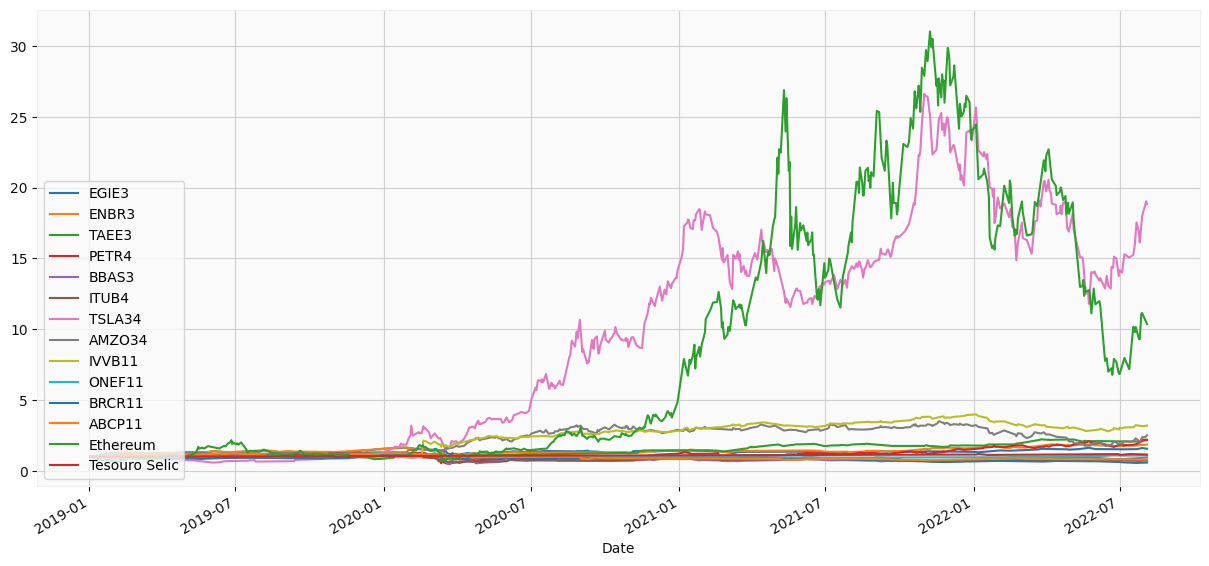

In [ ]:
ativos_normalizados = cotacoes / cotacoes.iloc[0]
ativos_normalizados.plot(figsize=(15, 7))
plt.legend(loc='lower left')
plt.show()

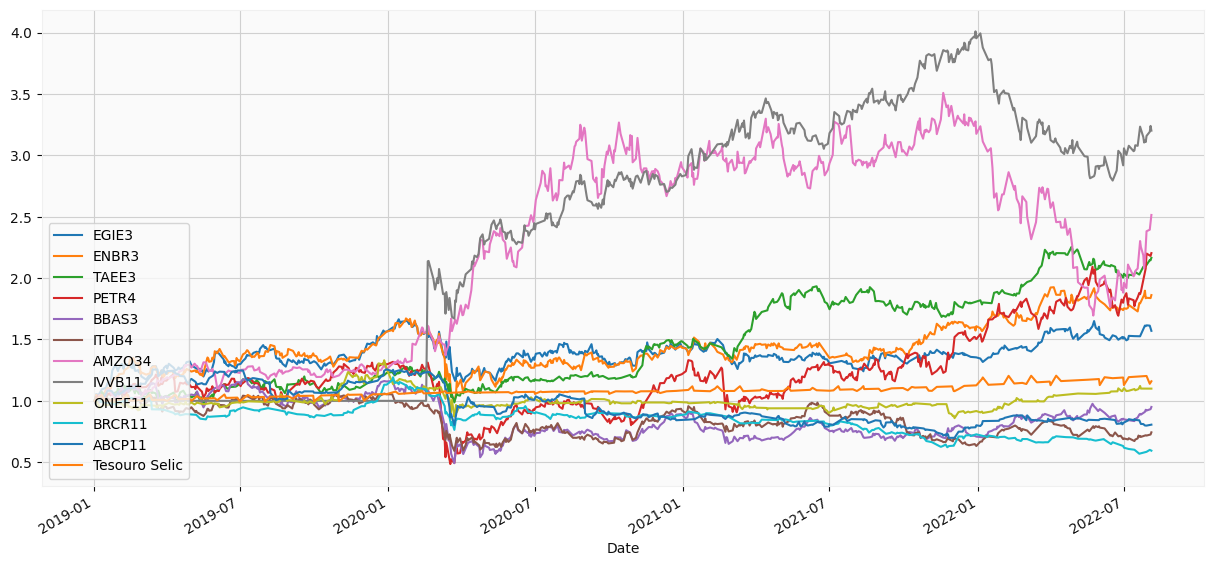

In [ ]:
ativos_normalizados.drop(columns=['Ethereum', 'TSLA34'], axis=1).plot(figsize=(15, 7))
plt.legend(loc='lower left')
plt.show()

##### Valor investido

In [ ]:
ativos_investidos = pd.DataFrame()
for ativo in carteira['Ativos']:
    ativos_investidos[ativo] = ativos_normalizados[ativo] * carteira.loc[carteira['Ativos']==ativo]['Valor Investido'].sum()
ativos_investidos

,EGIE3,ENBR3,TAEE3,PETR4,BBAS3,ITUB4,TSLA34,AMZO34,IVVB11,ONEF11,BRCR11,ABCP11,Tesouro Selic,Ethereum
Date,,,,,,,,,,,,,,
2019-01-02,15000.000000,25000.000000,20000.000000,30000.000000,15000.000000,10000.000000,5000.000000,10000.000000,10000.000000,30000.000000,20000.000000,10000.000000,100000.000000,30000.000000
2019-01-03,15492.092879,26040.201116,20223.469525,30735.661990,15061.725356,10164.868408,4461.454229,10000.000000,10000.000000,30000.000000,20234.611056,10057.207363,100497.256383,28855.963441
2019-01-04,15824.700293,26234.134862,20625.701818,30822.938704,15061.725356,9994.595257,4491.165024,9987.303544,10000.000000,29963.758482,20198.076200,10114.415634,100978.376810,29909.883719
2019-01-07,15726.683140,25476.024890,20513.975470,31309.229924,14962.957460,10013.512436,4491.165024,10240.464161,10000.000000,28993.286966,20307.690263,10297.480649,102643.573872,29352.109322
2019-01-08,15904.889287,25564.176226,20223.469525,31122.199018,14793.202108,10140.543010,4491.165024,10458.005600,10000.000000,28189.930166,20250.000316,10297.480649,103228.300585,29092.914669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,24124.574617,45906.194836,41943.658410,62400.157162,13908.878868,7195.703027,85191.552978,23230.042992,31084.175495,33143.063441,11476.676711,7954.184705,120195.174475,333858.868117
2022-07-29,24228.678993,45990.972760,42160.663883,65994.589849,13816.691591,7171.413560,90051.602504,23814.780018,31582.491582,32923.831497,11694.731576,7983.710178,120254.978363,334234.012600
2022-08-02,24190.325979,45948.583798,42935.676875,65376.193071,13889.673308,7207.160432,93354.181842,23944.797927,31919.191919,32782.456246,12009.470898,8021.801498,113881.981616,315956.755129


### 6. Rentabilidade da carteira e do IBOV no período

Rentabilidade da carteira e do IBOV no período

In [ ]:
ativos_investidos['Total'] = ativos_investidos.sum(axis=1)
ativos_investidos = ativos_investidos / ativos_investidos.iloc[0]

retorno_carteira = ativos_investidos['Total'][-1] / ativos_investidos['Total'][0] - 1
retorno_selic = ativos_normalizados['Tesouro Selic'][-1] / ativos_normalizados['Tesouro Selic'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
retorno_eth = ethereum[-1] / ethereum[0] - 1

print('Retorno da carteira: {:.2%}'.format(retorno_carteira))
print('Retorno do tesouto selic: {:.2%}'.format(retorno_selic))
print('Retorno do IBOV: {:.2%}'.format(retorno_ibov))
print('Retorno do ethereum: {:.2%}'.format(retorno_eth))

Retorno da carteira: 152.32%
Retorno do tesouto selic: 15.95%
Retorno do IBOV: 16.99%
Retorno do ethereum: 1101.30%


Agora, vamos visualizar as variações no período

[]

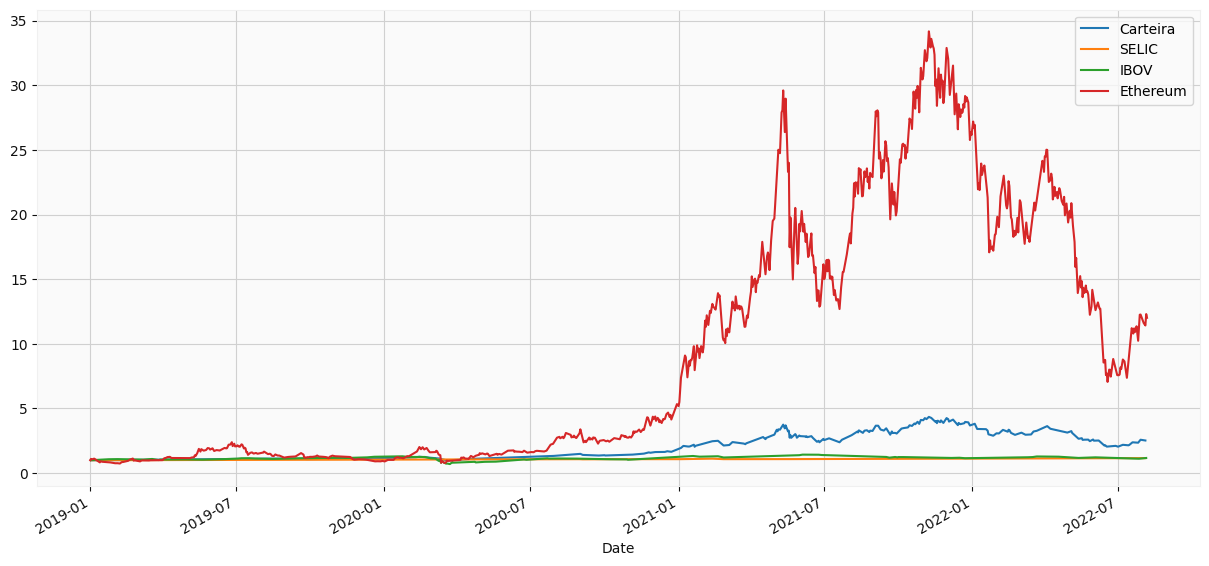

In [ ]:
investidos_normalizado = ativos_investidos / ativos_investidos.iloc[0]
ibov_normalizado = cotacao_ibov / cotacao_ibov.iloc[0]
eth_normalizado = ethereum / ethereum.iloc[0]

ativos_investidos['Total'].plot(figsize=(15, 7), label='Carteira')
ativos_investidos['Tesouro Selic'].plot(label='SELIC')
ibov_normalizado['Adj Close'].plot(label='IBOV')
eth_normalizado.plot(label='Ethereum')
plt.legend()
plt.plot()

### 7. Bônus: Análise fundamentalista

In [ ]:
def pega_fundamentos(site, ticker):
    tabelas = pd.read_html(site)
    tabela_final = tabelas[0]
    for tabela in tabelas[1:]:
        tabela_final = tabela_final.append(tabela)
    tabela_final = tabela_final.rename(columns={1: ticker})
    return tabela_final.set_index(0).T

In [ ]:
import requests

h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36'}
energia = ['CPFE3', 'EGIE3', 'ELET3', 'ENBR3', 'ENGI11', 'ENEV3', 'NEOE3', 'TAEE3']
fundamentos_energia = pd.DataFrame()

for ticker in energia:
    link = f'https://sg.finance.yahoo.com/quote/{ticker}.SA/key-statistics?p={ticker}.SA'
    resposta = requests.get(link, headers=h)
    tabela = pega_fundamentos(resposta.text, ticker)
    fundamentos_energia = fundamentos_energia.append(tabela)

fundamentos_energia

,Market cap (intra-day),Enterprise value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/sales (ttm),Price/book (mrq),Enterprise value/revenue,Enterprise value/EBITDA,Beta (5Y monthly),...,Diluted EPS (ttm),Quarterly earnings growth (yoy),Total cash (mrq),Total cash per share (mrq),Total debt (mrq),Total debt/equity (mrq),Current ratio (mrq),Book value per share (mrq),Operating cash flow (ttm),Levered free cash flow (ttm)
CPFE3,NaN,NaN,7.82,9.0,NaN,0.97,NaN,1.53,6.03,0.53,...,4.46,13.00%,4.1B,3.56,27.33B,191.06,0.94,12.16,6.43B,2.4B
EGIE3,35.15B,49.99B,20.03,12.66,NaN,2.88,4.44,4.09,7.06,0.53,...,2.15,23.70%,4.31B,5.29,21.54B,271.69,1.40,9.71,2.46B,759.62M
ELET3,110.41B,138.69B,11.56,NaN,NaN,1.60,1.40,3.59,9.34,0.72,...,4.15,69.20%,15.29B,9.74,43.73B,55.28,1.71,50.24,6.64B,17.25B
ENBR3,13.03B,23.61B,6.01,8.94,NaN,0.70,1.16,1.24,4.58,0.37,...,3.83,10.60%,2.56B,4.51,13.43B,107.94,1.66,19.82,3.05B,-1.52B
ENGI11,11.64B,18.78B,NaN,26.81,NaN,NaN,NaN,0.68,2.80,1.02,...,1.38,-38.30%,4.77B,2.64,23.63B,233.55,1.17,4.93,1.34B,-754.1M
ENEV3,24.68B,29.99B,16.90,NaN,NaN,3.77,1.81,5.64,12.35,0.71,...,0.85,24.70%,1.13B,0.71,9.78B,104.14,NaN,7.33,NaN,NaN
NEOE3,20.33B,54.16B,4.84,7.28,NaN,0.45,0.80,1.20,4.77,0.74,...,3.46,7.30%,6.83B,5.63,43.32B,168.04,1.25,20.98,2.11B,-4.52B
TAEE3,15.04B,21.83B,7.19,5.78,NaN,4.54,2.09,6.61,7.29,NaN,...,2.02,-19.20%,1.84B,5.35,8.64B,120.72,3.09,19.40,1.81B,666.86M


In [ ]:
fundamentos_energia = fundamentos_energia.dropna(axis=1, how='all')
fundamentos_energia.shape

(8, 53)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


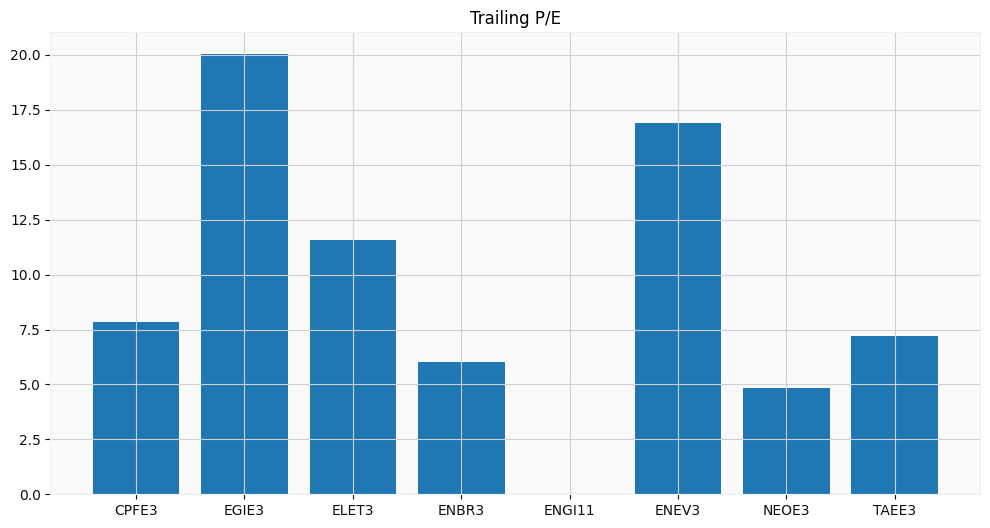

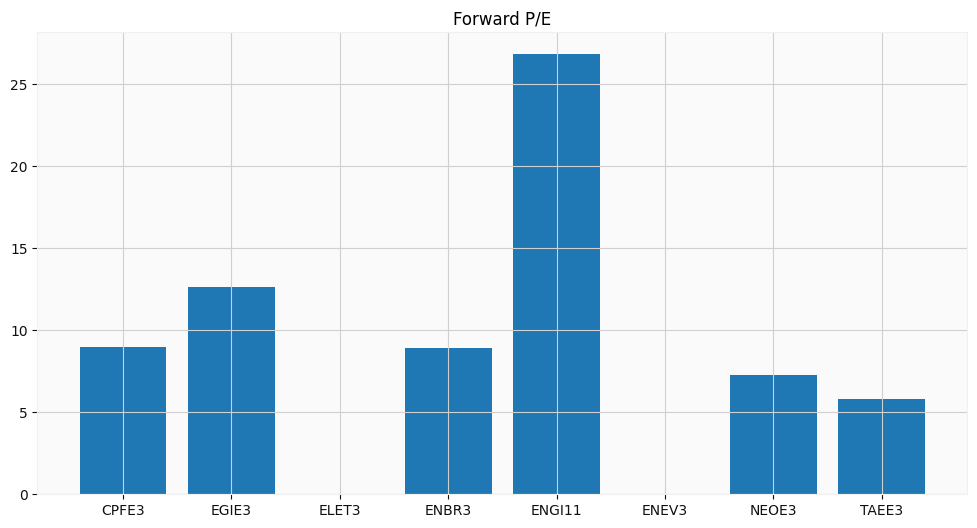

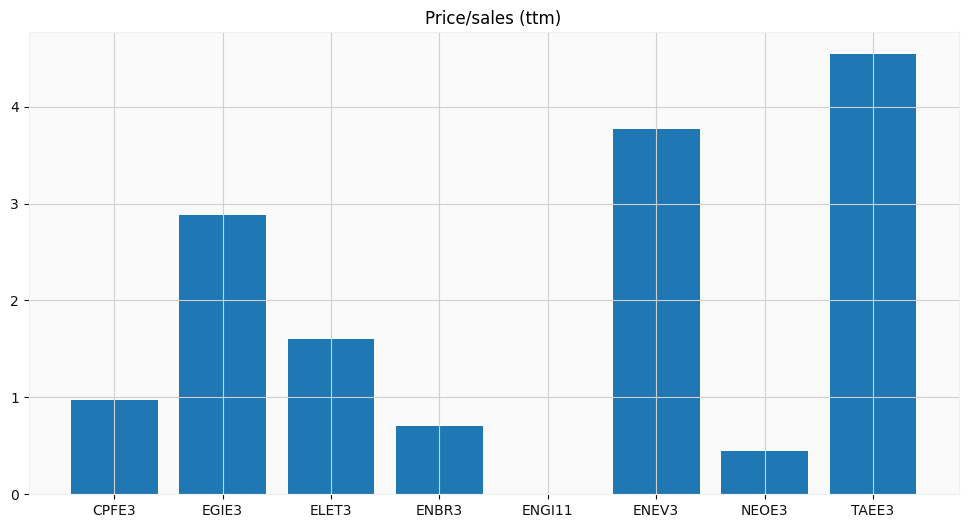

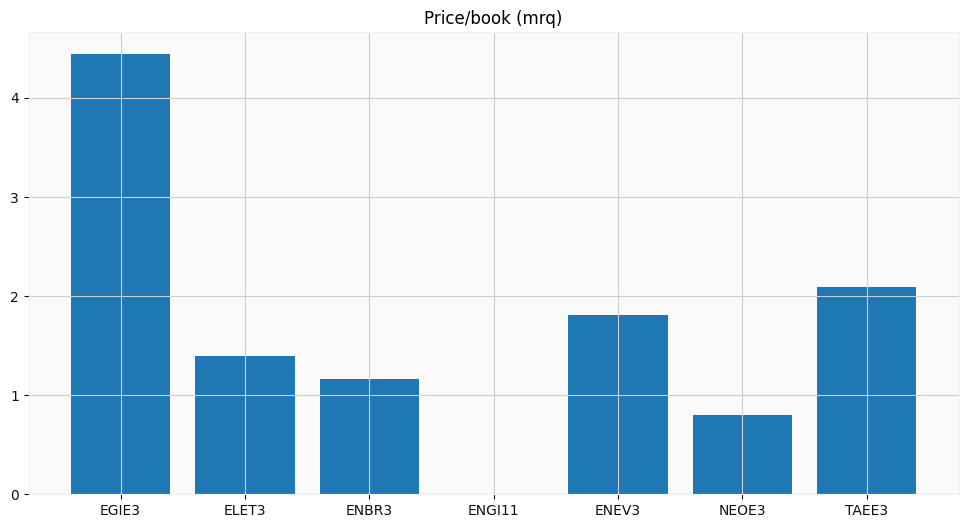

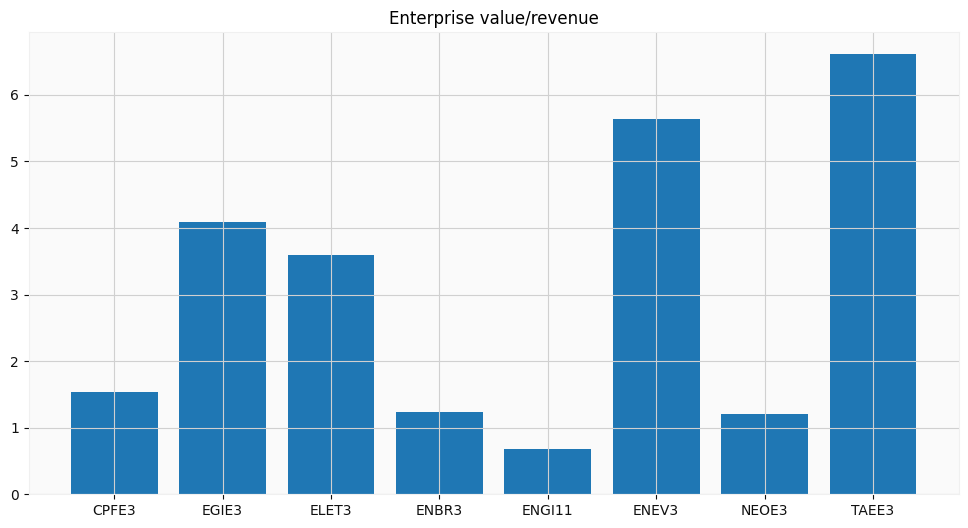

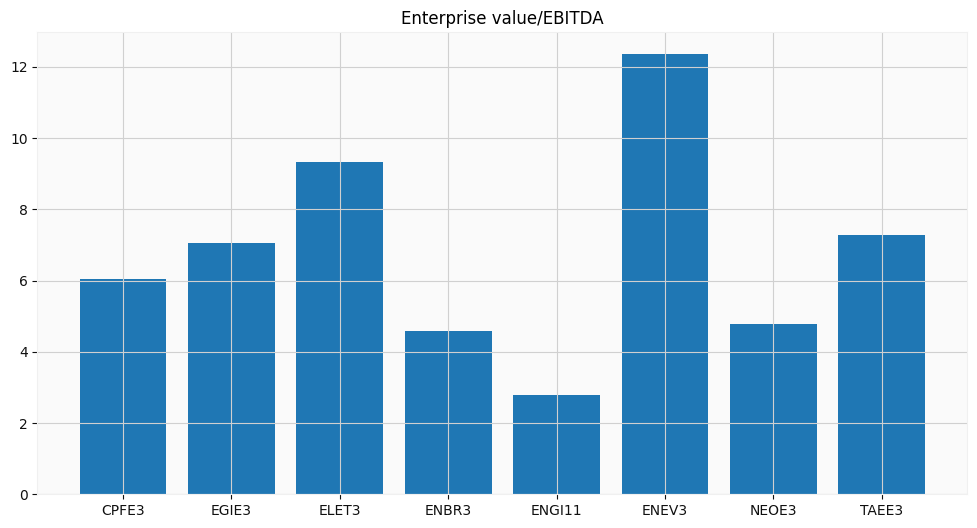

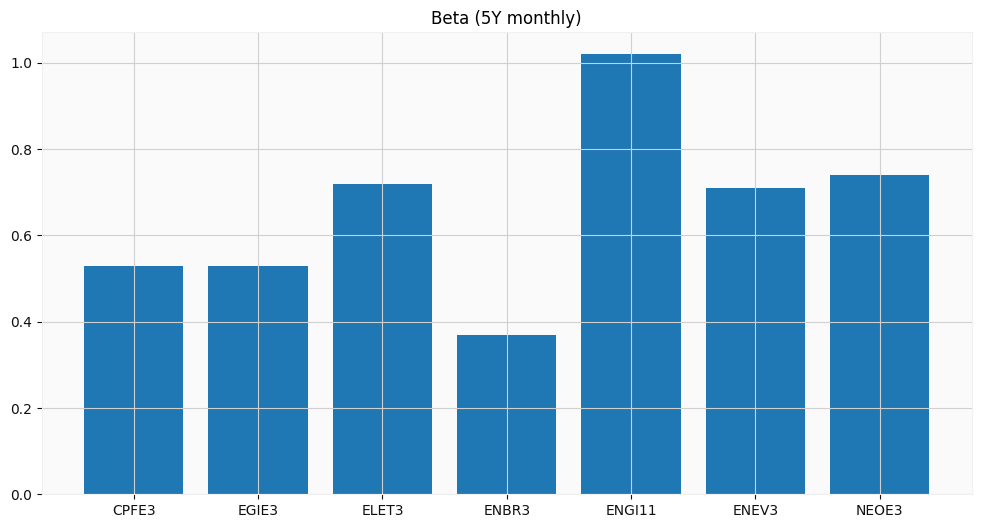

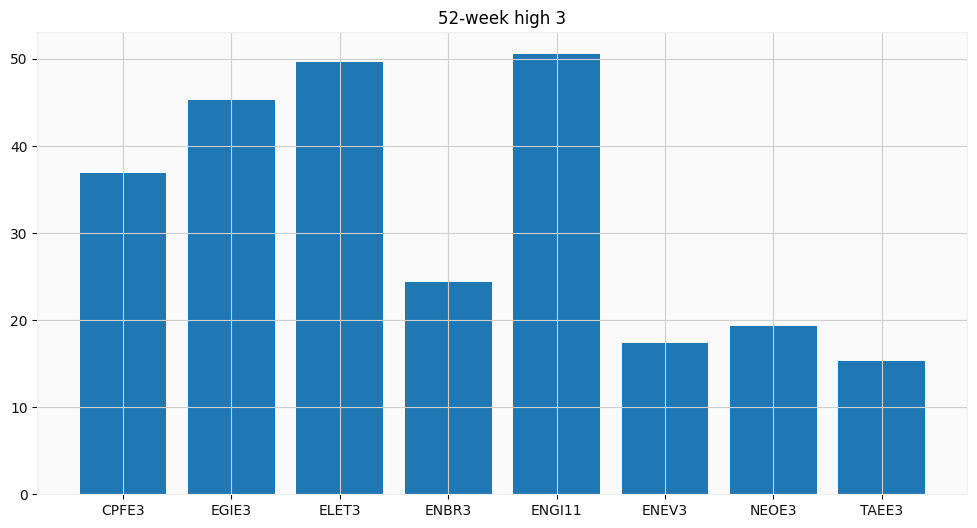

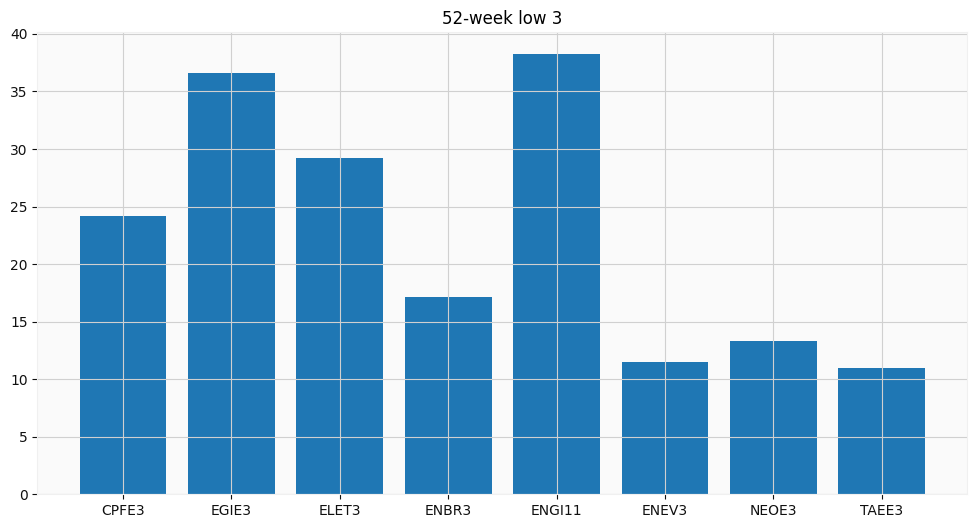

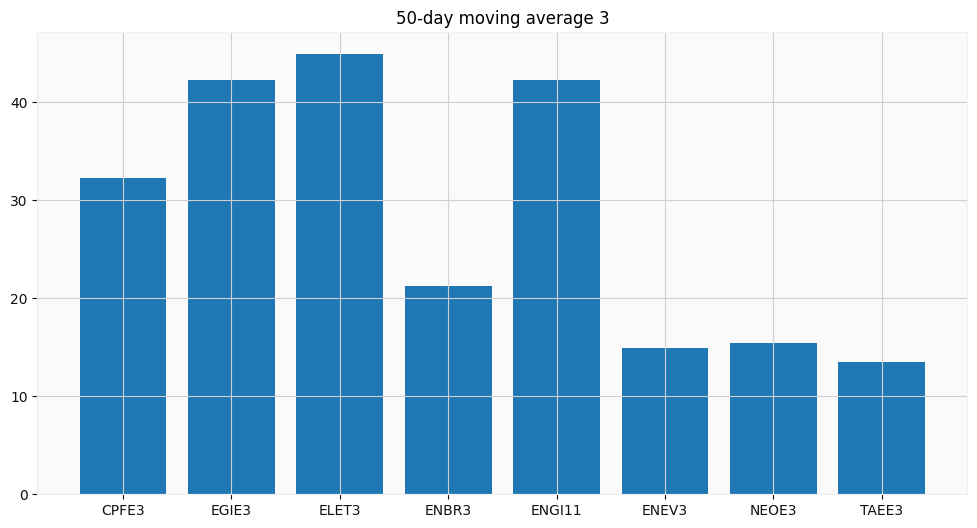

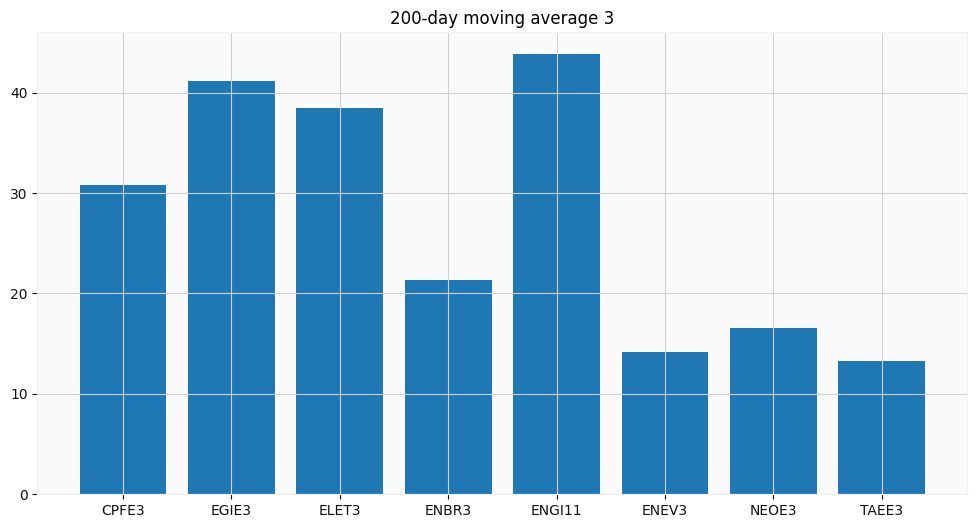

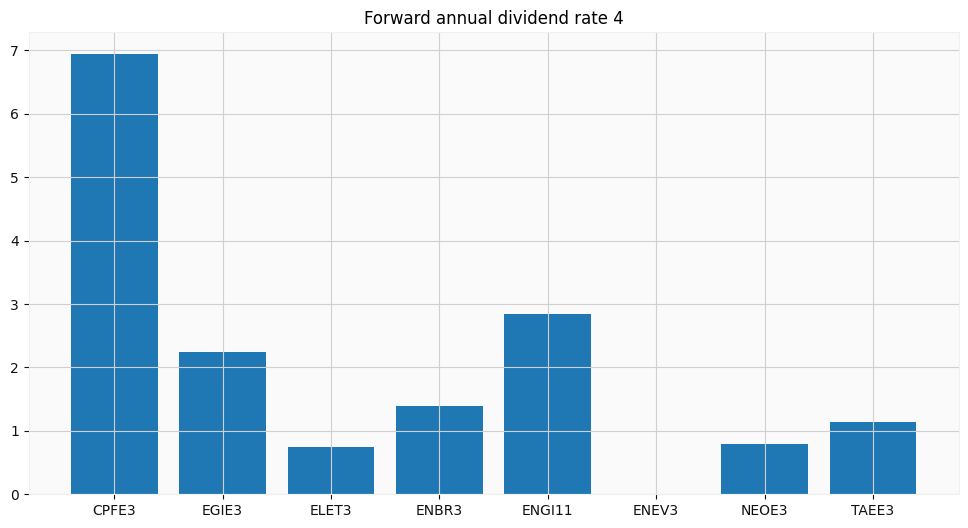

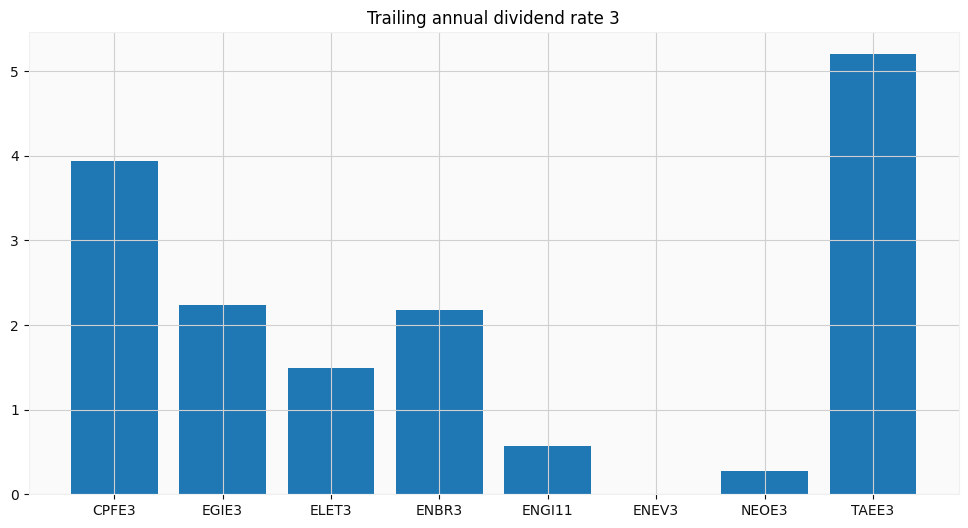

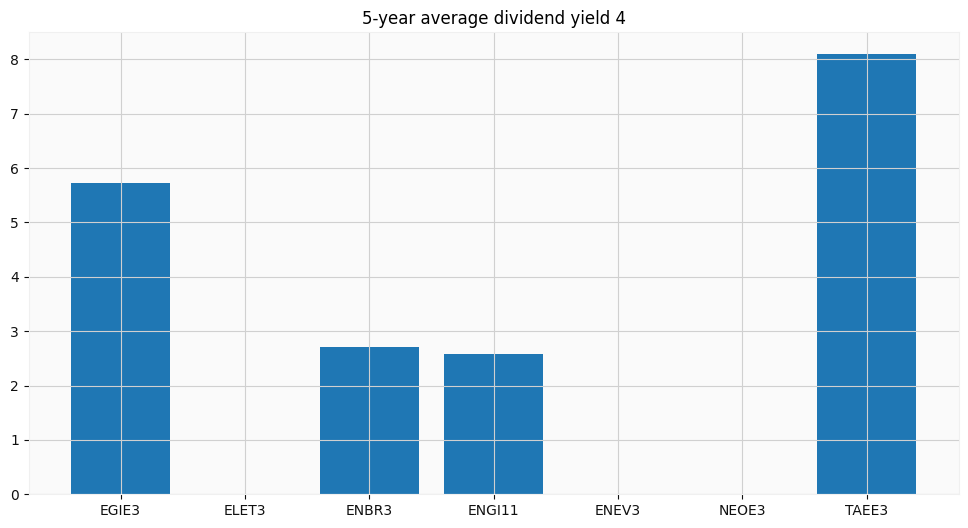

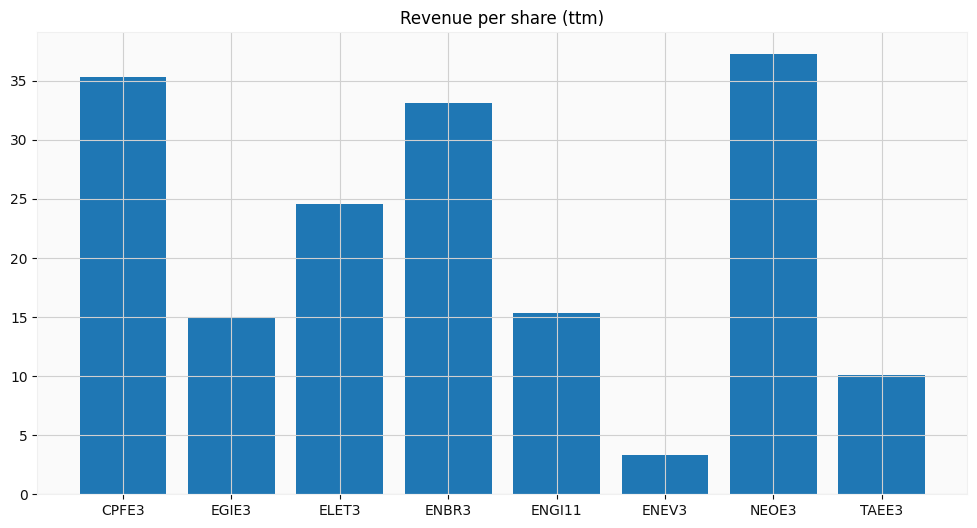

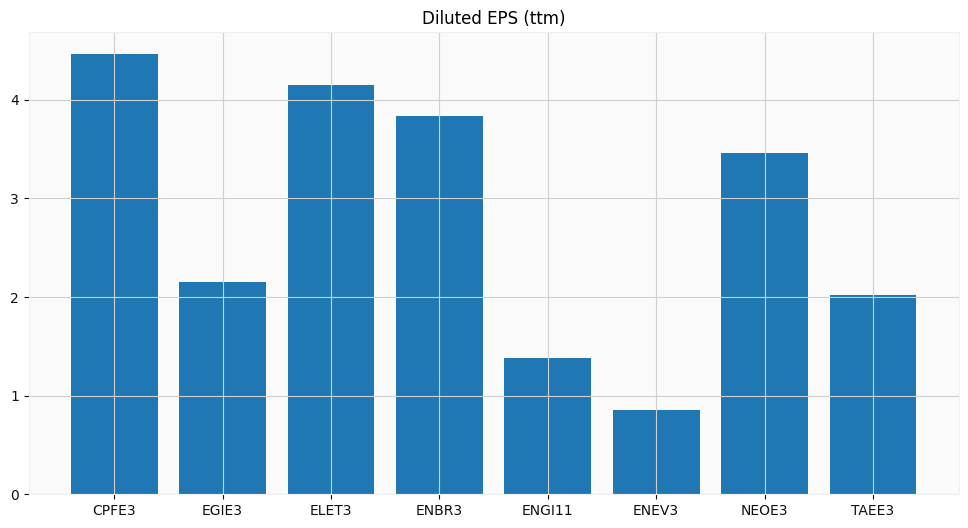

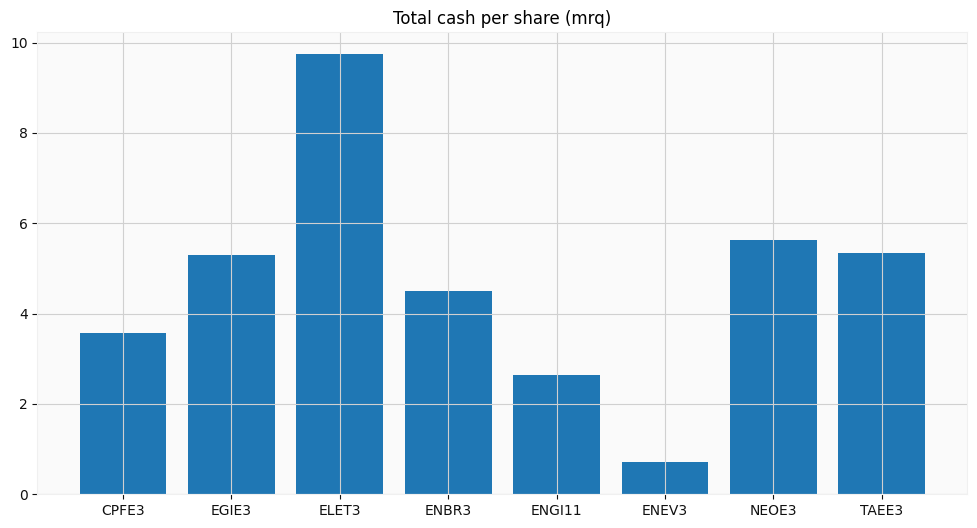

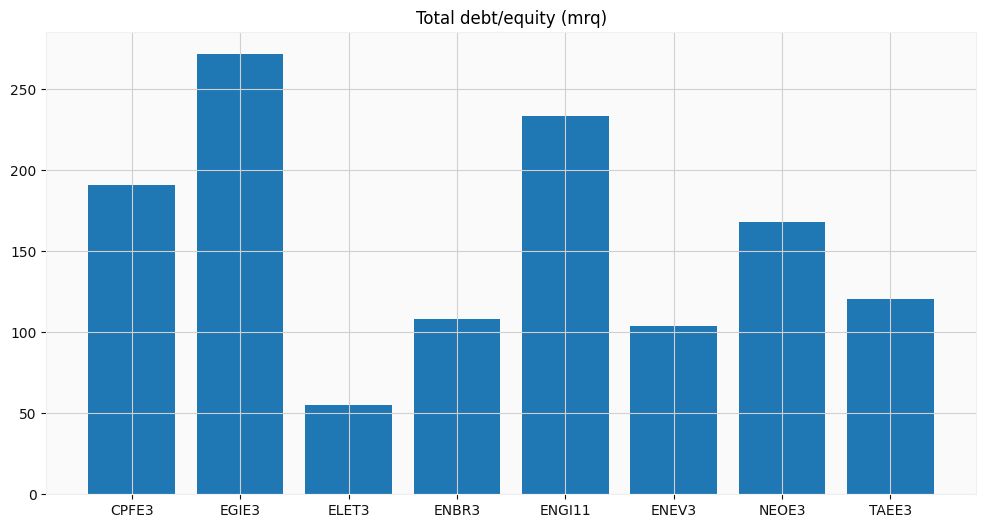

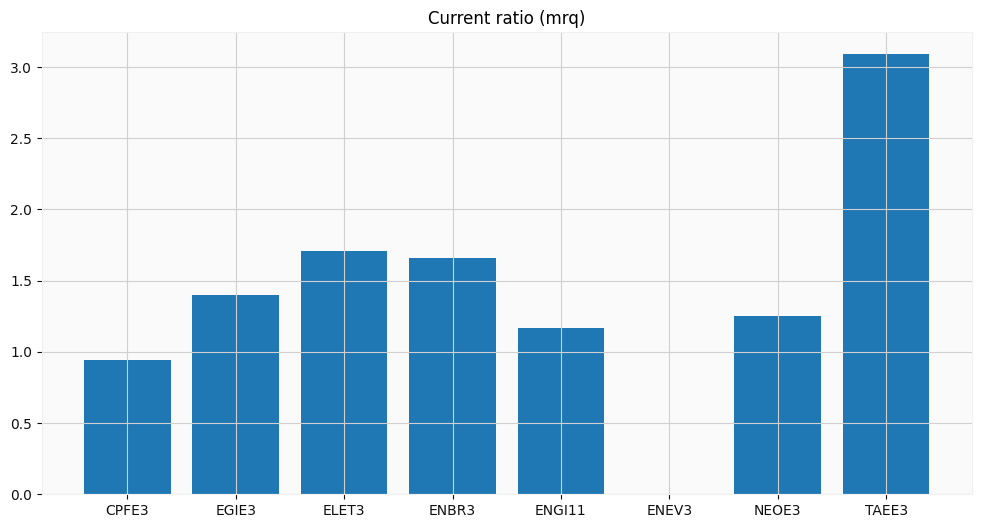

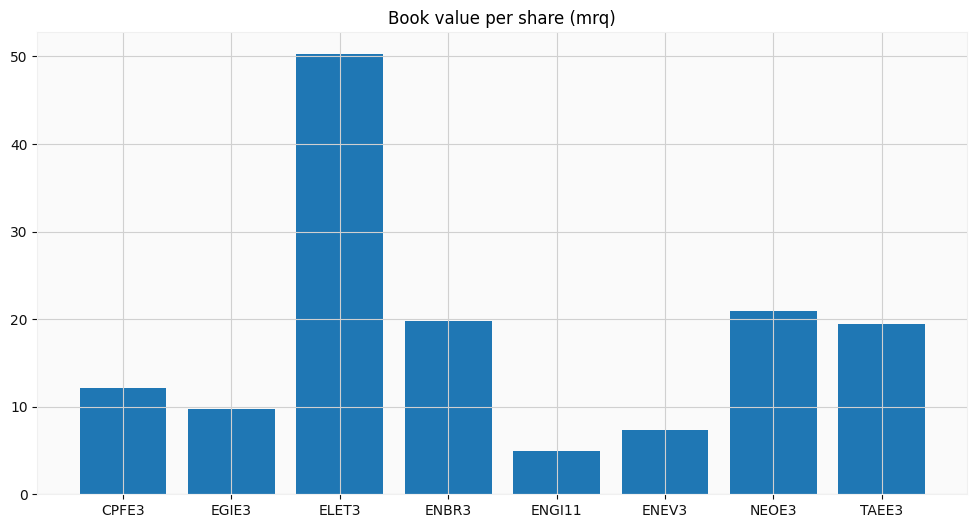

Não foi possível plotar o gráfico de 33 colunas, são elas: ['Market cap (intra-day)', 'Enterprise value', '52-week change 3', 'S&P500 52-week change 3', 'Avg vol (3-month) 3', 'Avg vol (10-day) 3', 'Shares outstanding 5', 'Implied shares outstanding 6', 'Float 8', '% held by insiders 1', '% held by institutions 1', 'Forward annual dividend yield 4', 'Trailing annual dividend yield 3', 'Payout ratio 4', 'Ex-dividend date 4', 'Last split factor 2', 'Last split date 3', 'Fiscal year ends', 'Most-recent quarter (mrq)', 'Profit margin', 'Operating margin (ttm)', 'Return on assets (ttm)', 'Return on equity (ttm)', 'Revenue (ttm)', 'Quarterly revenue growth (yoy)', 'Gross profit (ttm)', 'EBITDA', 'Net income avi to common (ttm)', 'Quarterly earnings growth (yoy)', 'Total cash (mrq)', 'Total debt (mrq)', 'Operating cash flow (ttm)', 'Levered free cash flow (ttm)']


In [ ]:
nao_plotou = []

for coluna in fundamentos_energia.columns:
    try:
        fundamentos_energia[coluna] = pd.to_numeric(fundamentos_energia[coluna])
        plt.figure(figsize=(12, 6))
        plt.bar(fundamentos_energia.index, fundamentos_energia[coluna])
        plt.title(coluna)
        plt.show()
    except ValueError:
        nao_plotou.append(coluna)
print(f'Não foi possível plotar o gráfico de {len(nao_plotou)} colunas, são elas: {nao_plotou}')